## Step 4. Exploratory data analysis (Python)

### Importing the files

In [35]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#import requests# # Import the library for sending requests to the server
#import re## importing the library for regular expression
#from bs4 import BeautifulSoup # Import the library for webpage parsing

pd.set_option("display.max_rows", 10)

In [36]:
#Url Path for the data.
url1='datasets/project_sql_result_01.csv'
url2='datasets/project_sql_result_04.csv'

#Loading files locally in to dataframe
data_company=pd.read_csv(url1)
data_dropoff_location=pd.read_csv(url2)

### Verifying data and their types.

In [37]:
#Verifying files and data.
display(data_company.head())
display(data_dropoff_location.head())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [38]:
display(data_company.tail())
display(data_dropoff_location.tail())

,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
63,3556 - 36214 RC Andrews Cab,2


,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000


In [39]:
display(data_company.sample(5))
display(data_dropoff_location.sample(5))

,company_name,trips_amount
31,American United Taxi Affiliation,210
47,4615 - 83503 Tyrone Henderson,21
29,303 Taxi,250
8,Star North Management LLC,7455
32,Leonard Cab Co,147


,dropoff_location_name,average_trips
74,Beverly,10.500000
3,West Loop,5163.666667
59,Chatham,23.200000
87,Pullman,3.896552
37,Bridgeport,77.100000


In [40]:
#Verifying basic informatoin and data type of company table.
data_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [41]:
#Verifying basic informatoin and data type of dropoff table.
data_dropoff_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [42]:
#checking the table for null values.
print(data_company.isnull().sum())

company_name    0
trips_amount    0
dtype: int64


In [43]:
#checking the table for null values.
data_dropoff_location.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

#### Conclusion
It's seems data types of both the tables are correct. Also tables does not contain null values. So we move to further steps.

### Study the data they contain

In [44]:
#checking the data in data_company table.
display(data_company.describe())
display(data_company.describe(include=['object']))
data_company['company_name'].unique()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,company_name
count,64
unique,64
top,Chicago Taxicab
freq,1


array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Associat', 'Checker Taxi Affiliation',
       'Blue Diamond', 'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha ride inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada',
       '6

In [45]:
#checking the data in data_dropoff_location table.
display(data_dropoff_location.describe())
display(data_dropoff_location.describe(include=['object']))
#data_company['company_name'].unique()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


,dropoff_location_name
count,94
unique,94
top,"Sauganash,Forest Glen"
freq,1


In [46]:
#Checking duplicate records.
print(data_company['company_name'].duplicated().sum())
print(data_dropoff_location['dropoff_location_name'].duplicated().sum())

0
0


#### Conclusion:
1. It seems there is a huge variation in the data.
2. There are approx. 50% of data for which trips_amount is below 200. We can exclude all those later for further analysis.
3. As 75% of trip_amount of individual taxi reaches only till approx. 2000 so we can say now there are very few taxi companies which are holding the maximum market.
4. When I see the dropoff data, It's revealed that there are only few dropoff location for which there are high demand. so we can concentrate only those area initially.

So far We have checked both the tables for null, 0 and duplicates values. Their Data types are also valid in both the table. So now we move forward for further analysis.

### Identify the top 10 neighborhoods in terms of drop-offs

In [47]:
data_dropoff_location_Top10 =data_dropoff_location.sort_values(by='average_trips', ascending=False).head(10)

In [48]:
display(data_dropoff_location_Top10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

In [49]:
#Importing library for graph.
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

**As we notcied above, there are many taxi companies for which trips_amount are even less than 100. SO we filter some of those and than make Graph.**
1. We first sort all data by trip_amount and take data of first 30 records and group all others in 'Others' group and take mean value for the same. So after that we will have 31 records.

In [50]:

data_company_grp= data_company.sort_values(by='trips_amount', ascending=False)[31:]#fetching all records from 31 index.

data_company_grp['company_name']='Others'
data_company_grp['trips_amount']=(data_company_grp['trips_amount'].mean())
data_company_grp.drop_duplicates(subset=['company_name','trips_amount'],inplace=True)#Creates df with 'Others' and their mean value.
#display(data_company_grp)

data_company=data_company.sort_values(by='trips_amount', ascending=False)[0:31]
data_company=data_company.append(data_company_grp,ignore_index=True,sort=True)#Combine two df.
display(data_company)#Final data.


,company_name,trips_amount
0,Flash Cab,19558.000000
1,Taxi Affiliation Services,11422.000000
2,Medallion Leasin,10367.000000
3,Yellow Cab,9888.000000
4,Taxi Affiliation Service Yellow,9299.000000
...,...,...
27,Service Taxi Association,402.000000
28,5 Star Taxi,310.000000
29,303 Taxi,250.000000
30,Setare Inc,230.000000


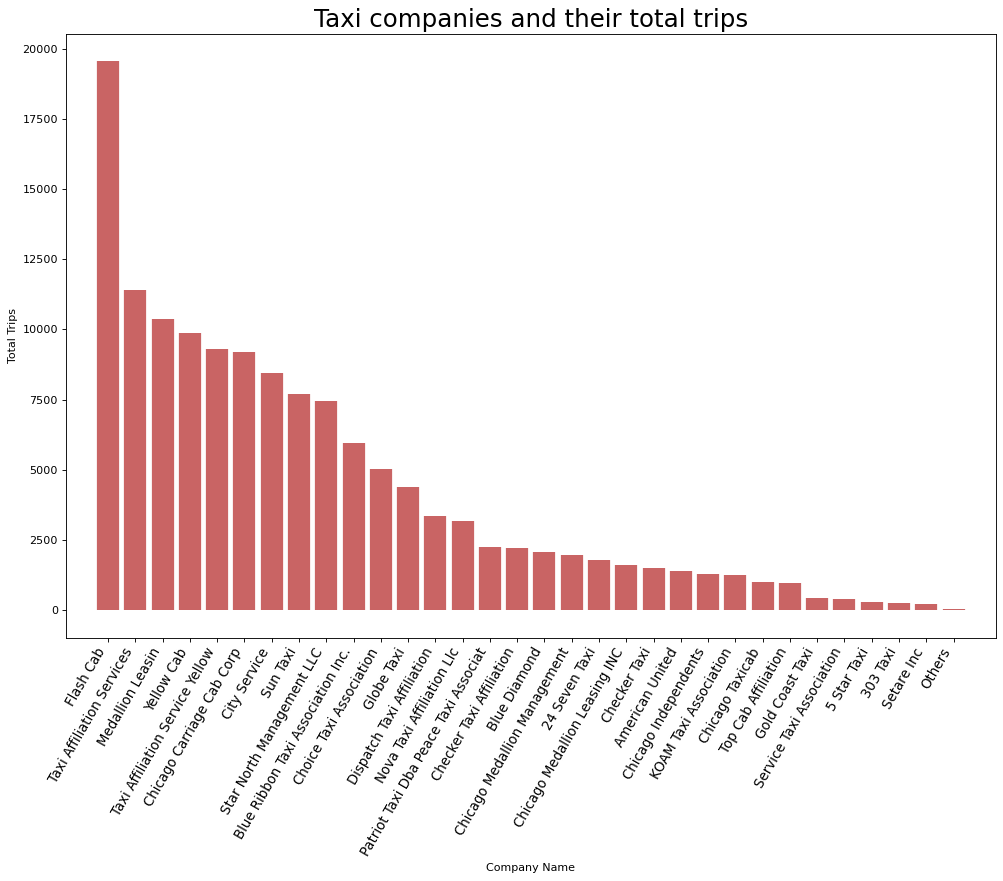

In [51]:
#Plotting Bar Graph for the above df.
fig, ax = plt.subplots(figsize=(15,10), facecolor='white', dpi= 80)
ax.vlines(x=data_company.company_name, ymin=0, ymax=data_company.trips_amount, color='firebrick', alpha=0.7, linewidth=20)

# Title, Label, Ticks and Ylim
ax.set_title('Taxi companies and their total trips', fontdict={'size':22})
ax.set_ylabel('Total Trips')
ax.set_xlabel('Company Name')
plt.xticks(data_company.company_name, data_company.company_name, rotation=60, horizontalalignment='right', fontsize=12)
plt.show()

#### Conclusion
1. As there are lost of data of small trips so I take the first 30 highest taxi companies based on their total trips and rest are grouped in the Other category.
2. Flash Cab has the highest no. of trips from all other taxi companies. 
3. Also the other taxi company are far behind than Flash Cab. So we need some more data from Flash Cab like their taxi types, No. of taxis and their availabily etc. to understand why their total trips are the highest.

### Top 10 neighborhoods by number of dropoffs

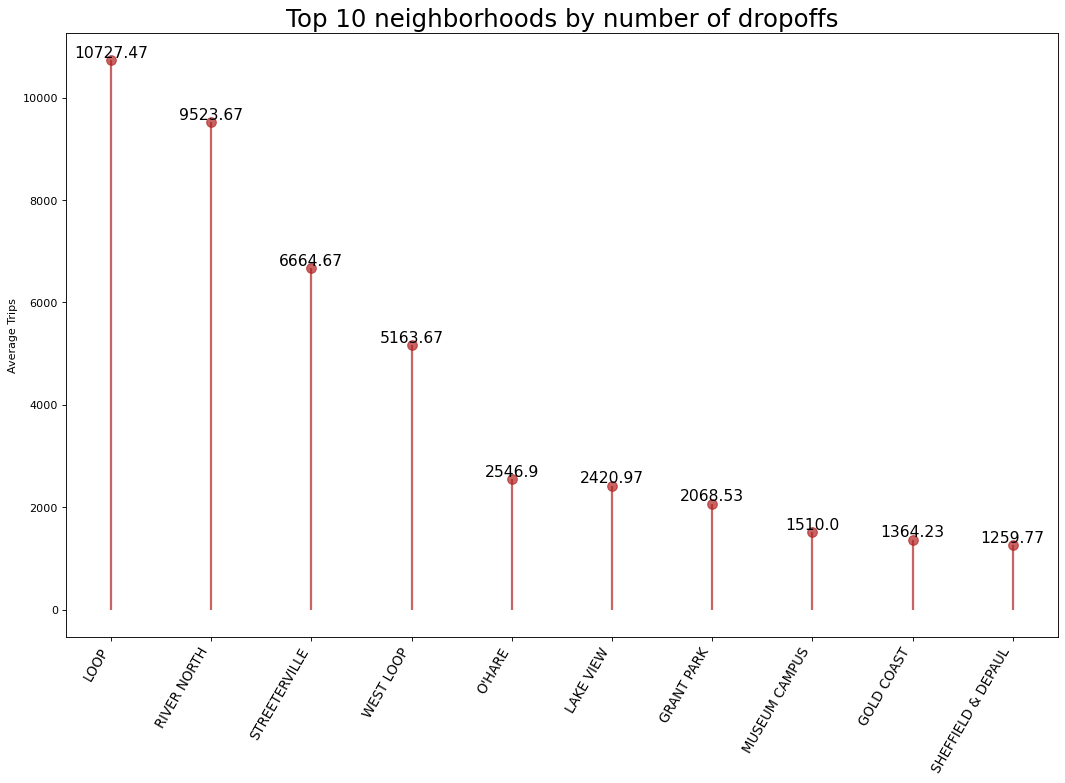

In [52]:
#Plotting Lollipop graph for dropoff location.
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=data_dropoff_location_Top10.index, ymin=0, ymax=data_dropoff_location_Top10.average_trips, 
          color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=data_dropoff_location_Top10.index, y=data_dropoff_location_Top10.average_trips,
           s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 10 neighborhoods by number of dropoffs', fontdict={'size':22})
ax.set_ylabel('Average Trips')
ax.set_xticks(data_dropoff_location_Top10.index)
ax.set_xticklabels(data_dropoff_location_Top10.dropoff_location_name.str.upper(), rotation=60, 
                   fontdict={'horizontalalignment': 'right', 'size':12})
# Annotate
for row in data_dropoff_location_Top10.itertuples():
    ax.text(row.Index, row.average_trips+.5, s=round(row.average_trips, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
plt.show()


### Conclusion:

Loop, River North neighborhood are highest in terms of dropoffs.<br>

So we can conclude that, we can include these dropoffs location in our taxi comapany initially, as they are the highest dropoffs location in Chicago.


## Step 5. Testing hypotheses (Python)

In [53]:
#Import packages
from scipy import stats as st
import numpy as np


In [54]:
#Url Path for the data.
url3='https://code.s3.yandex.net/datasets/project_sql_result_07.csv'

#Loading files locally in to dataframe
data_LoopToHare=pd.read_csv(url3)
display(data_LoopToHare)


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


### "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

**Null Hypothesis H0:** Average duration of rides from the Loop to O'Hare International Airport does not changes on rainy Saturdays<br/>
**Alternative Hypothesis H1:** Average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [55]:
data_LoopToHare=data_LoopToHare.dropna()# droping all null values.

data_LoopToHare_nonrainy=data_LoopToHare[data_LoopToHare['weather_conditions']=='Good']['duration_seconds']# fetching only non rainy day data.
data_LoopToHare_rainy=data_LoopToHare[data_LoopToHare['weather_conditions']=='Bad']['duration_seconds']#fetching only rainy data.

print('Variance of duration of non rainy saturday ', data_LoopToHare_nonrainy.var())
print('Variance of duration of rainy ',data_LoopToHare_rainy.var())

alpha = .05 # critical statistical significance level
results = st.ttest_ind(
        data_LoopToHare_nonrainy, 
        data_LoopToHare_rainy,equal_var=False)#We pas equal_var as False as the variance of both sample are not equal.
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

        
#converting avg. seconds in to minutes.
avg_nonrainy=(data_LoopToHare_nonrainy.mean()/60)
avg_rainy=(data_LoopToHare_rainy.mean()/60)
print('Avg. duration of non rainy Saturdays: {0:.2f}'.format(avg_nonrainy))   
print('Avg. duration of rainy Saturdays: {0:.2f}'.format(avg_rainy))


Variance of duration of non rainy saturday  576382.0096895089
Variance of duration of rainy  520294.08600248274
p-value:  6.738994326108734e-12
We reject the null hypothesis
Avg. duration of non rainy Saturdays: 33.33
Avg. duration of rainy Saturdays: 40.45


As we have two statistical populations here which are based on same samples so we apply the method scipy.stats.ttest_ind(array1, array2, equal_var).

After examine the p-value, We can say that we reject the null hypothesis, So now we can conclude that "Average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays".

I also calculated the average for both rainy and non rainy saturday and found that on an average taxi arrives 7 min. faster on non rainy saturday than on rainy saturday.
